<h1> Sentiment Analysis on GameStop and Microsoft</h1>
<ul>This IPython Notebook shows you the comparison between the two stocks GameStop(GME) and Microsoft (MSFT) using textblob and will graph you the comparison between the 2 stocks</ul>

In [1]:
#import tweepy
from textblob import TextBlob
import nltk
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<h3> 1. Here we will load up the 2 csv, Gamestop and Microsoft. </h3>

In [2]:
gme_tweets=pd.read_csv('gme_tweets.csv', parse_dates=[0], infer_datetime_format=True)#, nrows=2700)
#gme_tweets.head()

In [3]:
msft_tweets=pd.read_csv('MSFT_tweets.csv', parse_dates=[0], infer_datetime_format=True)
#msft_tweets.head()

<h3> 2. We will then only need the date and tweet columns </h3>

In [4]:
gme_tweetsdate = pd.DataFrame(gme_tweets[['date', 'tweet']])
gme_tweetsdate = gme_tweetsdate.dropna()
gme_tweetsdate.head(10)

,date,tweet
0,2021-03-31 07:58:41,Out of all the stupid work acronyms over time-...
1,2021-03-31 07:56:43,#GME #GMEStock #GameStop #reddit #RedditArmy #...
2,2021-03-31 07:54:01,GameStop's PT cut by Telsey Advisory Group to ...
3,2021-03-31 07:53:59,"Guy honked at me, flipped me off, told me to g..."
4,2021-03-31 07:51:01,For my $Nakd fam had to drop a track for my fa...
5,2021-03-31 07:49:39,#amcstock #amc #GME more and more pressure bui...
6,2021-03-31 07:47:47,1/2 (cont.) it would be very easy for them to ...
7,2021-03-31 07:46:58,#amc $amc $gme #gme A whole learning thread ...
8,2021-03-31 07:43:02,@jimcramer hey cram cram or jimmy Jims. You ho...
9,2021-03-31 07:41:49,Ball is in your court @WebullGlobal #amc #am...


In [5]:
msft_tweetsdate = pd.DataFrame(msft_tweets[['date', 'tweet']])
msft_tweetsdate = msft_tweetsdate.dropna()
msft_tweetsdate.head(10)

,date,tweet
0,2021-03-31 05:28:01,.@TechRepublic: How to reset a network connect...
1,2021-03-31 05:16:42,📡 RADAR DE STOCKS 📡 Preço mínimo de 7 dias: #...
2,2021-03-31 04:35:40,"""Mat how do you unwind when you work a long da..."
3,2021-03-31 04:24:01,.@Computerworld: Patch Tuesday recap: This mon...
4,2021-03-31 03:45:40,@Jbuehler777 @RaoulGMI So I would like to buy ...
5,2021-03-31 03:43:31,@doksanboluiki @ECezairli @eugene_dero @memreo...
6,2021-03-31 03:01:29,Microsoft Ignite wrap-up on Inside Microsoft T...
7,2021-03-31 02:01:27,What’s new for Teams phones | March 2021 http...
8,2021-03-31 00:02:41,Microsoft Lens can now scan up to 100 pages to...
9,2021-03-30 23:16:40,Great to see #msft continuous commitment to di...


<h3>3. Here we will do some data cleaning. Eg. Removing hyperlinks, hashtags, Retweets and weird symbols </h3>

In [6]:
import re

def clean(tweet):
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    tweet = re.sub(r'#', '', tweet)
    tweet = re.sub(r'[?|$|.|!]',r'', tweet)
    tweet = re.sub(r'[^\x00-\x7f]',r' ', tweet)
    tweet = re.sub(r'@[A-Za-z0–9]+', '', tweet) 
    return tweet

def read_tweets(file_name):
    with open(file_name, 'r', encoding="utf8") as f:
        tweets = [clean(line.strip()) for line in f]
    f.close()
    return tweets


<h3>4. We will then apply the cleaning function in our tweets column</h3>

In [7]:
gme_tweetsdate['tweet'] = gme_tweetsdate['tweet'].apply(clean)
gme_tweetsdate['tweet'].str.decode('utf8')
gme_tweetsdate = gme_tweetsdate['tweet'].astype(str)
#tweetdate = gme_tweetsdate['date']
gme_tweetsdate.head(10)

0    Out of all the stupid work acronyms over time-...
1    GME GMEStock GameStop reddit RedditArmy roarin...
2    GameStop's PT cut by Telsey Advisory Group to ...
3    Guy honked at me, flipped me off, told me to g...
4    For my Nakd fam had to drop a track for my fav...
5    amcstock amc GME more and more pressure buildi...
6    1/2 (cont) it would be very easy for them to d...
7     amc amc gme gme   A whole learning thread of 20:
8     hey cram cram or jimmy Jims You holding some ...
9    Ball is in your court    amc amcstock DiamondH...
Name: tweet, dtype: object

In [8]:
msft_tweetsdate['tweet'] = msft_tweetsdate['tweet'].apply(clean)
msft_tweetsdate['tweet'].str.decode('utf8')
msft_tweetsdate = msft_tweetsdate['tweet'].astype(str)
#tweetdate = gme_tweetsdate['date']
msft_tweetsdate.head(10)

0    : How to reset a network connection in Windows...
1      RADAR DE STOCKS    Pre o m nimo de 7 dias: A...
2    "Mat how do you unwind when you work a long da...
3    : Patch Tuesday recap: This month, an  Ides of...
4    777  So I would like to buy something like an ...
5      _dero   Bill beyi ekliyorum ben, bence ufkum...
6    Microsoft Ignite wrap-up on Inside Microsoft T...
7            What s new for Teams phones  March 2021  
8    Microsoft Lens can now scan up to 100 pages to...
9    Great to see msft continuous commitment to dig...
Name: tweet, dtype: object

<h3>5. Here we check the polarity and surjectivity of any sentence in our tweet column</h3>

In [9]:
print(gme_tweetsdate[11])
print(TextBlob(gme_tweetsdate[11]).sentiment)

deepfuckingvalue GME DiamondHands  
Sentiment(polarity=0.0, subjectivity=0.0)


In [10]:
print(msft_tweetsdate[11])
print(TextBlob(msft_tweetsdate[11]).sentiment)

1 hour charts for all 78 instruments are available for members viewing  
Sentiment(polarity=0.4, subjectivity=0.4)


<h3>6. Now we will then check polarity and surjectivity on all the sentences in the column and plot the scatterplots and distribution plot </h3>
<h4>Note:</h4>
<li> Polarity means the float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement</li>
<li>Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].</li>

In [11]:
polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity

In [12]:
gme_tweet_polarity = np.zeros(len(gme_tweetsdate))
gme_tweet_subjectivity = np.zeros(len(gme_tweetsdate))
gme_total_polarity = 0
for idx, tweet in enumerate(gme_tweetsdate):
    gme_tweet_polarity[idx] = polarity(tweet)
    gme_tweet_subjectivity[idx] = subjectivity(tweet)
    gme_total_polarity += gme_tweet_polarity[idx]

In [13]:
msft_tweet_polarity = np.zeros(len(msft_tweetsdate))
msft_tweet_subjectivity = np.zeros(len(msft_tweetsdate))
msft_total_polarity = 0
for idx, tweet in enumerate(msft_tweetsdate):
    msft_tweet_polarity[idx] = polarity(tweet)
    msft_tweet_subjectivity[idx] = subjectivity(tweet)
    msft_total_polarity += msft_tweet_polarity[idx]


C:\Users\Gotwin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Gotwin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


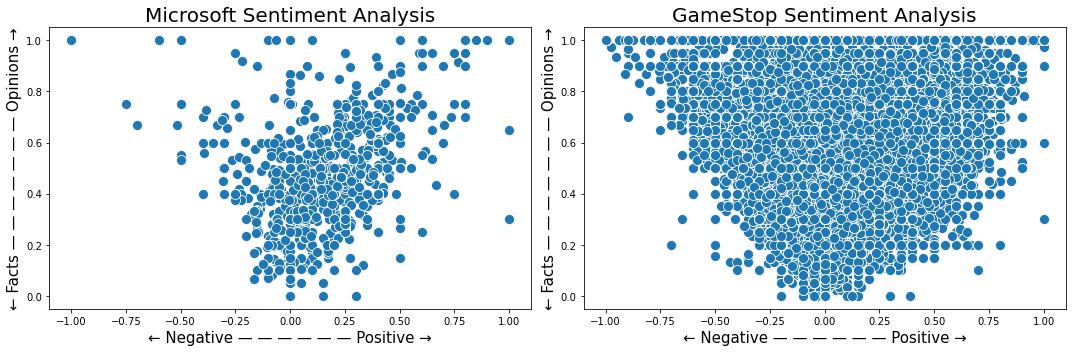

In [14]:
f, axs = plt.subplots(1, 2, figsize=(15,5))
sns.scatterplot(msft_tweet_polarity, # X-axis
                msft_tweet_subjectivity,  # Y-axis
                s=100,ax=axs[0]);

sns.scatterplot(gme_tweet_polarity, # X-axis
                gme_tweet_subjectivity,  # Y-axis
                s=100,ax=axs[1]);


axs[0].set_title("Microsoft Sentiment Analysis", fontsize = 20)
axs[0].set_xlabel('← Negative — — — — — — Positive →', fontsize=15)
axs[0].set_ylabel('← Facts — — — — — — — Opinions →', fontsize=15)

axs[1].set_title("GameStop Sentiment Analysis", fontsize = 20)
axs[1].set_xlabel('← Negative — — — — — — Positive →', fontsize=15)
axs[1].set_ylabel('← Facts — — — — — — — Opinions →', fontsize=15)


plt.tight_layout()

C:\Users\Gotwin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gotwin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Gotwin\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-

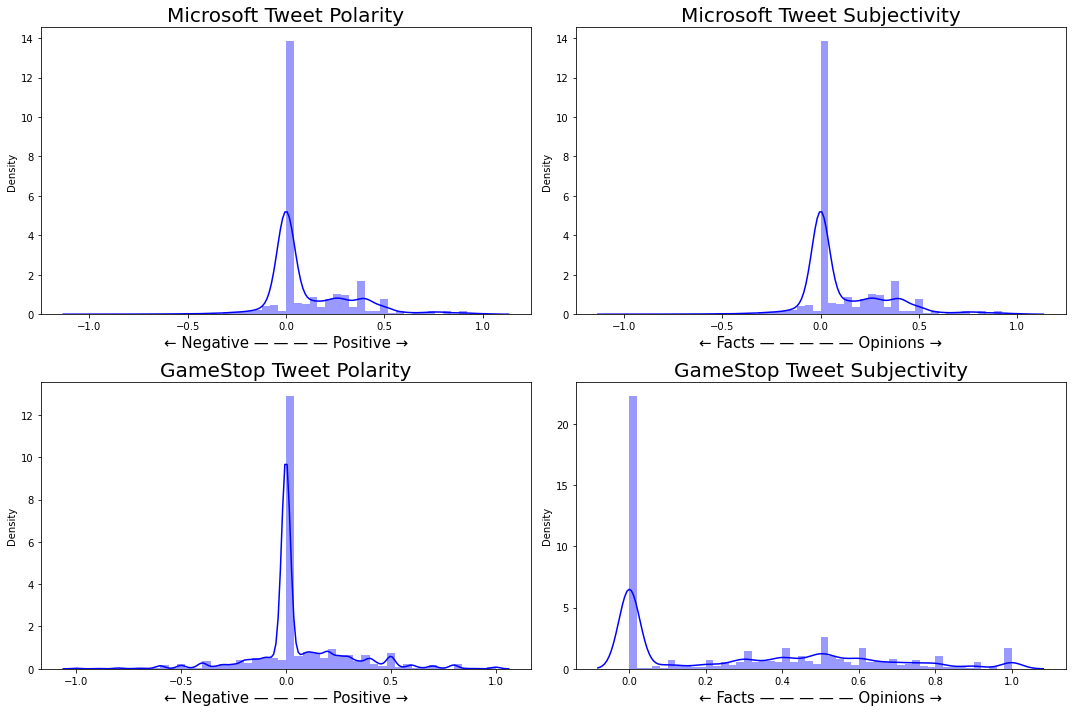

In [15]:
f, axs = plt.subplots(2, 2, figsize=(15,10))

sns.distplot(msft_tweet_polarity, color="b", ax=axs[0,0])
axs[0,0].set_title("Microsoft Tweet Polarity", fontsize = 20)
axs[0,0].set_xlabel('← Negative — — — — Positive →', fontsize=15)
sns.distplot(msft_tweet_polarity, color="b", ax=axs[0,1])
axs[0,1].set_title("Microsoft Tweet Subjectivity", fontsize = 20)
axs[0,1].set_xlabel('← Facts — — — — — Opinions →', fontsize=15)

sns.distplot(gme_tweet_polarity, color="b", ax=axs[1,0])
axs[1,0].set_title("GameStop Tweet Polarity", fontsize = 20)
axs[1,0].set_xlabel('← Negative — — — — Positive →', fontsize=15)
sns.distplot(gme_tweet_subjectivity, color="b", ax=axs[1,1])
axs[1,1].set_title("GameStop Tweet Subjectivity", fontsize = 20)
axs[1,1].set_xlabel('← Facts — — — — — Opinions →', fontsize=15)

plt.tight_layout()

In [16]:
print(gme_total_polarity)

10664.656266550977


In [17]:
print(msft_total_polarity)

292.5234548308835
